<a href="https://colab.research.google.com/github/econb/data-science-mae/blob/main/1_Tarea_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='gray'>Eduardo Contreras B.  
Temas Avanzados en Estadística: Ciencia de Datos  
Universidad Nacional de Colombia</font>

<h1><center><font color='blue'>Entendiendo Jupyter Lab, Github, Python y Regresión Lineal</font></center></h1>

# Introducción
La regresión lineal es un modelo matemático para aproximar la relación  que permite encontrar la relación entre...

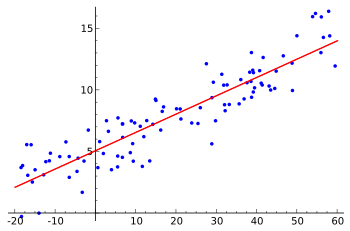



# Historia
The earliest form of regression was the method of least squares, which was published by Legendre in 1805,[4] and by Gauss in 1809.





# Algoritmo
$ Y \sim N_n(XB, \sigma^2I)$

$L(B) = \frac{1}{(2\pi)^{n/2}} \frac{1}{\left | \sigma^2I \right |^{-1/2}} e^{-\frac{1}{2\sigma^2}(Y-XB)^T(Y-XB)} $

$logL(B) = -\frac{n}{2}log(2\pi) -\frac{1}{2}log\left| \sigma^2I \right| -\frac{1}{2\sigma^2}(Y-XB)^T(Y-XB)$

$\frac{\partial logL(B)}{\partial B} = -\frac{1}{2}\frac{2}{\sigma^2}(X^TXB-X^TY)$

$\frac{\partial logL(B)}{\partial B} = 0$

$-\frac{1}{\sigma^2}(X^TXB-X^TY) = 0$

$\hat{B}=(X^TX)^{-1}X^TY$


# Ejemplo

In [32]:
#Read data
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd

data = datasets.load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names) #data.data is a numpy ndarray
Y = pd.DataFrame(data.target, columns=["MEDV"]) #data.target is a numpy ndarray

In [34]:
#Linear Regression with statsmodels
fitsm = sm.OLS(Y, sm.add_constant(X)).fit()
print(fitsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        00:21:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [62]:
#Linear Regression with sklearn
from sklearn import feature_selection
from sklearn import linear_model

modelskl = linear_model.LinearRegression()
fitskl = modelskl.fit(X,Y)
print("Coefficients")
print(fitskl.coef_)

fvals, pvals = sklearn.feature_selection.f_regression(X, Y)
print("pvalues")
print(pvals)

print("R-squared")
predskl = modelskl.predict(X)
sklearn.metrics.r2_score(Y, predskl)

Coefficients
[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
pvalues
[1.17398708e-19 5.71358415e-17 4.90025998e-31 7.39062317e-05
 7.06504159e-24 2.48722887e-74 1.56998221e-18 1.20661173e-08
 5.46593257e-19 5.63773363e-29 1.60950948e-34 1.31811273e-14
 5.08110339e-88]
R-squared


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7406426641094095

In [82]:
#Linear Regresion by computing the equation
import numpy as np

Xnp = np.asmatrix(sm.add_constant(X).values)
Ynp = np.asmatrix(Y.values)
B = np.matmul(np.linalg.inv(np.matmul(Xnp.T,Xnp)), np.matmul(Xnp.T,Ynp))
B

matrix([[ 3.64594884e+01],
        [-1.08011358e-01],
        [ 4.64204584e-02],
        [ 2.05586264e-02],
        [ 2.68673382e+00],
        [-1.77666112e+01],
        [ 3.80986521e+00],
        [ 6.92224640e-04],
        [-1.47556685e+00],
        [ 3.06049479e-01],
        [-1.23345939e-02],
        [-9.52747232e-01],
        [ 9.31168327e-03],
        [-5.24758378e-01]])

# Conclusiones


# Referencias
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
